#Importing Libraries

In [ ]:
import os
import pandas as pd
import numpy as np

import matplotlib. pyplot as plt
import matplotlib
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model

import tensorflow as tf
from tensorflow import keras
from  tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [ ]:
df= pd.read_csv("/content/NIFTY 50_Data.csv") 

In [ ]:
df.shape

(5761, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5761 entries, 0 to 5760
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5761 non-null   object 
 1   Open    5761 non-null   float64
 2   High    5761 non-null   float64
 3   Low     5761 non-null   float64
 4   Close   5761 non-null   float64
dtypes: float64(4), object(1)
memory usage: 225.2+ KB


#Converting date column from object to 'Date' datatype"

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5761 entries, 0 to 5760
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5761 non-null   datetime64[ns]
 1   Open    5761 non-null   float64       
 2   High    5761 non-null   float64       
 3   Low     5761 non-null   float64       
 4   Close   5761 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 225.2 KB


In [ ]:
df.head()

,Date,Open,High,Low,Close
0,2023-02-24,17591.35,17599.75,17421.80,17465.80
1,2023-02-23,17574.65,17620.05,17455.40,17511.25
2,2023-02-22,17755.35,17772.50,17529.45,17554.30
3,2023-02-21,17905.80,17924.90,17800.30,17826.70
4,2023-02-20,17965.55,18004.35,17818.40,17844.60


# Setting Date column as Index column

In [ ]:
df.set_index('Date', inplace=True)     #inplace true to make changes in original dataframe and not to make a copy

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close
Date,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2
2000-01-04,1594.40,1641.95,1594.40,1638.7
2000-01-05,1634.55,1635.50,1555.05,1595.8
2000-01-06,1595.80,1639.00,1595.80,1617.6
2000-01-07,1616.60,1628.25,1597.20,1613.3


# Checking for any missing values

In [ ]:
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
df.head(10)

,Open,High,Low,Close
Date,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2
2000-01-04,1594.40,1641.95,1594.40,1638.7
2000-01-05,1634.55,1635.50,1555.05,1595.8
2000-01-06,1595.80,1639.00,1595.80,1617.6
2000-01-07,1616.60,1628.25,1597.20,1613.3
2000-01-10,1615.65,1662.10,1614.95,1632.9
2000-01-11,1633.25,1639.90,1548.25,1572.5
2000-01-12,1572.30,1631.55,1571.70,1624.8
2000-01-13,1627.85,1671.15,1613.65,1621.4


#using asfreq function

In [ ]:
df_new = df.asfreq('B')

In [ ]:
df.shape,df_new.shape

((5761, 4), (6040, 4))

In [ ]:
df_new.isnull().sum()

Open     303
High     303
Low      303
Close    303
dtype: int64

# Filling missing values by frontfill (previous day value)

In [ ]:
df_new.fillna(method='ffill', inplace=True)

In [ ]:
df_new.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

#Decomposing the Time series

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [ ]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_new['Close'], model='multiplicative', extrapolate_trend='freq')

In [ ]:
# Additive Decomposition
result_add = seasonal_decompose(df_new['Close'], model='additive', extrapolate_trend='freq')

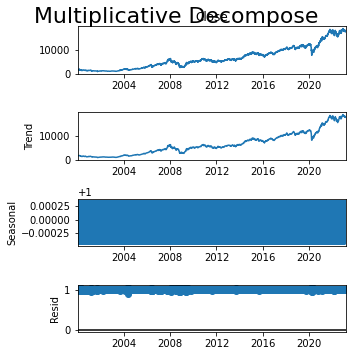

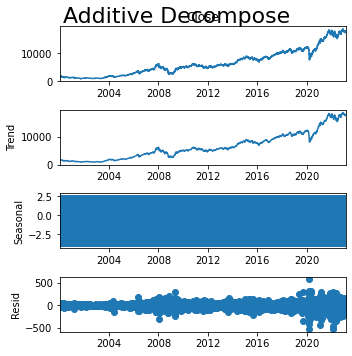

In [ ]:
# Plot
plt.rcParams.update({'figure.figsize': (5,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()


Here multiplicative model does not have repititions in residue so we are selecting Multiplicative model

#Applying regression  model for time series prediction

In [ ]:
ts_data = df_new[['Close']].copy()
ts_data.shape

(6040, 1)

In [ ]:
ts_data['close_t_1'] = ts_data['Close'].shift(1) # shift one value below
ts_data['close_t_2'] = ts_data['Close'].shift(2) # shift one value below
ts_data['close_t_3'] = ts_data['Close'].shift(3) # shift one value below
ts_data['close_t_4'] = ts_data['Close'].shift(4) # shift one value below
ts_data['close_t_5'] = ts_data['Close'].shift(5) # shift one value below
ts_data['close_t_6'] = ts_data['Close'].shift(6) # shift one value below
ts_data['close_t_7'] = ts_data['Close'].shift(7) # shift one value below
ts_data['close_t_8'] = ts_data['Close'].shift(8) # shift one value below
ts_data['close_t_9'] = ts_data['Close'].shift(9) # shift one value below
ts_data['close_t_10'] = ts_data['Close'].shift(10) # shift one value below
ts_data['close_t_11'] = ts_data['Close'].shift(11) # shift one value below
ts_data['close_t_12'] = ts_data['Close'].shift(12) # shift one value below
ts_data['close_t_13'] = ts_data['Close'].shift(13) # shift one value below
ts_data['close_t_14'] = ts_data['Close'].shift(14) # shift one value below
ts_data['close_t_15'] = ts_data['Close'].shift(15) # shift one value below

In [ ]:
ts_data.head(17)


,Close,close_t_1,close_t_2,close_t_3,close_t_4,close_t_5,close_t_6,close_t_7,close_t_8,close_t_9,close_t_10,close_t_11,close_t_12,close_t_13,close_t_14,close_t_15
Date,,,,,,,,,,,,,,,,
2000-01-03,1592.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,1638.7,1592.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,1595.8,1638.7,1592.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,1617.6,1595.8,1638.7,1592.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,1613.3,1617.6,1595.8,1638.7,1592.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,1632.9,1613.3,1617.6,1595.8,1638.7,1592.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-11,1572.5,1632.9,1613.3,1617.6,1595.8,1638.7,1592.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-12,1624.8,1572.5,1632.9,1613.3,1617.6,1595.8,1638.7,1592.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-13,1621.4,1624.8,1572.5,1632.9,1613.3,1617.6,1595.8,1638.7,1592.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ts_data.dropna(inplace=True)

In [ ]:
ts_data.head(7)

,Close,close_t_1,close_t_2,close_t_3,close_t_4,close_t_5,close_t_6,close_t_7,close_t_8,close_t_9,close_t_10,close_t_11,close_t_12,close_t_13,close_t_14,close_t_15
Date,,,,,,,,,,,,,,,,
2000-01-24,1613.6,1620.6,1601.1,1634.8,1606.7,1611.6,1622.7,1621.4,1624.8,1572.5,1632.9,1613.3,1617.6,1595.8,1638.7,1592.2
2000-01-25,1586.4,1613.6,1620.6,1601.1,1634.8,1606.7,1611.6,1622.7,1621.4,1624.8,1572.5,1632.9,1613.3,1617.6,1595.8,1638.7
2000-01-26,1586.4,1586.4,1613.6,1620.6,1601.1,1634.8,1606.7,1611.6,1622.7,1621.4,1624.8,1572.5,1632.9,1613.3,1617.6,1595.8
2000-01-27,1603.9,1586.4,1586.4,1613.6,1620.6,1601.1,1634.8,1606.7,1611.6,1622.7,1621.4,1624.8,1572.5,1632.9,1613.3,1617.6
2000-01-28,1599.1,1603.9,1586.4,1586.4,1613.6,1620.6,1601.1,1634.8,1606.7,1611.6,1622.7,1621.4,1624.8,1572.5,1632.9,1613.3
2000-01-31,1546.2,1599.1,1603.9,1586.4,1586.4,1613.6,1620.6,1601.1,1634.8,1606.7,1611.6,1622.7,1621.4,1624.8,1572.5,1632.9
2000-02-01,1549.5,1546.2,1599.1,1603.9,1586.4,1586.4,1613.6,1620.6,1601.1,1634.8,1606.7,1611.6,1622.7,1621.4,1624.8,1572.5


Now it is a normal regression problem with independent and dependent variables

#X,Y and train test split

In [ ]:
Y = ts_data['Close']
X = ts_data.drop('Close',axis=1)

In [ ]:
X.shape, Y.shape

((6025, 15), (6025,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.1, random_state=7)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((5422, 15), (603, 15), (5422,), (603,))

In [ ]:
def eval_fun(Y_test,Y_pred):
    from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
    mse = mean_squared_error(Y_test,Y_pred)
    mae = mean_absolute_error(Y_test,Y_pred)
    return mse, mae

In [ ]:
# create a RF regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50,max_depth=5, oob_score=True,random_state=7)
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=5, n_estimators=50, oob_score=True,
                      random_state=7)

In [ ]:
Y_pred_rf = rf.predict(X_test)

In [ ]:
mse, mae = eval_fun(Y_test,Y_pred_rf) 
print("mse = ", mse, " mae =", mae)

mse =  20796.261646841605  mae = 99.72637787519551


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth= 5, n_estimators= 50, subsample= 0.8,random_state=7)
gbr.fit(X_train,Y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=50, random_state=7,
                          subsample=0.8)

In [ ]:
Y_pred_gbr = gbr.predict(X_test)

In [ ]:
mse, mae = eval_fun(Y_test,Y_pred_gbr) 
print( "mse = ", mse, " mae =", mae)

mse =  7448.074386472882  mae = 57.66676193720374


Plotting the reslults of above ensemble models

In [ ]:
res = pd.DataFrame([Y_test.values, Y_pred_rf, Y_pred_gbr]).T
res.columns = ['Y_test', 'Y_pred_rf', 'Y_pred_gbr']
res.shape

(603, 3)

<AxesSubplot:>

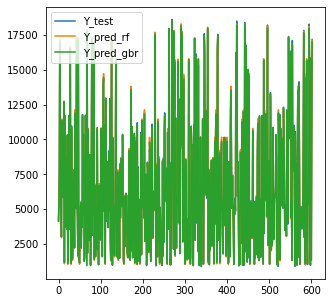

In [ ]:
res.plot()

# LSTM

Reshaping the training and testing data for LSTM

In [ ]:
X_train = np.reshape(X_train.values, (X_train.shape[0],X_train.shape[1], 1))

In [ ]:
X_train.shape

(5422, 15, 1)

Single layer with linear activation functio

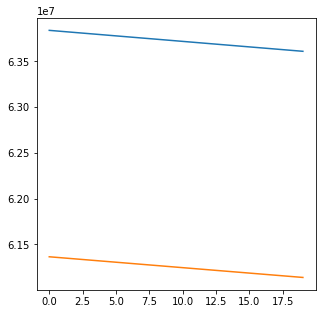

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Multiple LSTM layers with relu activation function

In [ ]:
model1 = keras.Sequential()

# LSTM layers
model1.add(keras.layers.LSTM(units=200,return_sequences = True, 
                            input_shape= (X_train.shape[1],X_train.shape[2])))

model1.add(keras.layers.LSTM(units=300,return_sequences = False))


model1.add( keras.layers.Dense(100, activation='relu'))
model1.add( keras.layers.Dense(90, activation='relu'))
model1.add( keras.layers.Dense(40, activation='relu'))
# model1.add( keras.layers.Dense(140, activation='relu'))
# model1.add( keras.layers.Dense(160, activation='relu'))
# model1.add( keras.layers.Dense(170, activation='relu'))
# model1.add( keras.layers.Dense(190, activation='relu'))
# model1.add( keras.layers.Dense(230, activation='relu'))
# model1.add( keras.layers.Dense(240, activation='relu'))
# model1.add( keras.layers.Dense(250, activation='relu'))

#  output layer
model1.add( keras.layers.Dense(1, activation='relu'))

# Compiling the LSTM
model1.compile(optimizer = 'adam', loss = 'mae')

In [ ]:
history = model1.fit(X_train, Y_train, validation_split=0.1,epochs = 100, batch_size = 50)

Epoch 1/100
98/98 [==============================] - 8s 21ms/step - loss: 5482.3394 - val_loss: 3653.2180
Epoch 2/100
98/98 [==============================] - 1s 8ms/step - loss: 3656.7432 - val_loss: 3546.4468
Epoch 3/100
98/98 [==============================] - 1s 8ms/step - loss: 3633.4873 - val_loss: 3521.0857
Epoch 4/100
98/98 [==============================] - 1s 7ms/step - loss: 3634.5127 - val_loss: 3525.7175
Epoch 5/100
98/98 [==============================] - 1s 8ms/step - loss: 3630.3083 - val_loss: 3522.0786
Epoch 6/100
98/98 [==============================] - 1s 8ms/step - loss: 3614.5198 - val_loss: 3436.3811
Epoch 7/100
98/98 [==============================] - 1s 8ms/step - loss: 3027.3760 - val_loss: 2337.7769
Epoch 8/100
98/98 [==============================] - 1s 8ms/step - loss: 2663.0066 - val_loss: 2018.3315
Epoch 9/100
98/98 [==============================] - 1s 8ms/step - loss: 2533.6047 - val_loss: 2153.7534
Epoch 10/100
98/98 [==============================] - 

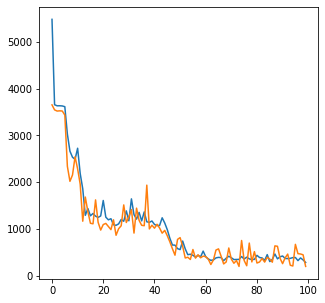

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
model2 = keras.Sequential()

# LSTM layers
model2.add(keras.layers.LSTM(units=200,return_sequences = True, 
                            input_shape= (X_train.shape[1],X_train.shape[2])))

model2.add(keras.layers.LSTM(units=300,return_sequences = False))


model2.add( keras.layers.Dense(100, activation='relu'))
model2.add( keras.layers.Dense(90, activation='relu'))
model2.add( keras.layers.Dense(40, activation='relu'))


#  output layer
model2.add( keras.layers.Dense(1, activation='relu'))

# Compiling the LSTM
model2.compile(optimizer = 'adam', loss = 'mae')

In [ ]:
history2 = model2.fit(X_train, Y_train, validation_split=0.1,epochs = 100, batch_size = 50)

Epoch 1/100
98/98 [==============================] - 9s 17ms/step - loss: 6494.0063 - val_loss: 6408.3530
Epoch 2/100
98/98 [==============================] - 1s 7ms/step - loss: 6494.0044 - val_loss: 6408.3530
Epoch 3/100
98/98 [==============================] - 1s 7ms/step - loss: 6494.0049 - val_loss: 6408.3530
Epoch 4/100
98/98 [==============================] - 1s 7ms/step - loss: 6494.0049 - val_loss: 6408.3530
Epoch 5/100
98/98 [==============================] - 1s 7ms/step - loss: 6494.0049 - val_loss: 6408.3530
Epoch 6/100
98/98 [==============================] - 1s 7ms/step - loss: 6494.0039 - val_loss: 6408.3530
Epoch 7/100
98/98 [==============================] - 1s 9ms/step - loss: 6494.0049 - val_loss: 6408.3530
Epoch 8/100
98/98 [==============================] - 1s 10ms/step - loss: 6494.0063 - val_loss: 6408.3530
Epoch 9/100
98/98 [==============================] - 1s 10ms/step - loss: 6494.0054 - val_loss: 6408.3530
Epoch 10/100
98/98 [==============================] 

In [ ]:
import pickle

In [ ]:
pickle.dump(model1,open("LSTM.pkl","wb"))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........25
.........26
.........27
.........28
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name               